# Model building and evaluation 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import shutil
from sklearn.metrics import auc
import supervision as sv
from supervision.metrics import MeanAveragePrecision
from ultralytics import YOLO

%matplotlib inline

In [2]:
IMAGE_PATH = 'image_chips_native'
LABEL_PATH = 'labels/labels_native'
PATH = os.getcwd()

images = os.listdir(IMAGE_PATH)
labels = os.listdir(LABEL_PATH)

print(f'Image counts: {len(images)}')
print(f'Label counts: {len(labels)}')

Image counts: 2542
Label counts: 2542


## Split the data into 80-20 train-test split. Use 10% of training data as validation.

In [3]:
images = sorted([img for img in os.listdir(IMAGE_PATH) if img.endswith('.tif')])
print(f"Total images after cleaning: {len(images)}")

TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.1

total_cnt = len(images)
train_cnt = int(TRAIN_SPLIT * total_cnt)
train_images = images[:train_cnt]
test_images = images[train_cnt:]

n_val = int(VAL_SPLIT * len(train_images))
val_images = random.sample(train_images, n_val)
train_final = [img for img in train_images if img not in val_images]

print(f'Train: {len(train_final)}; Val: {len(val_images)}; Test: {len(test_images)}')

Total images after cleaning: 2542
Train: 1830; Val: 203; Test: 509


In [4]:
DATA = os.path.join(PATH, "data")

for split in ["train", "val", "test"]:
    for sub in ["images", "labels"]:
        os.makedirs(os.path.join(DATA, split, sub), exist_ok=True)

def copy_files(file_list, split):
    for file in file_list:
        src_img = os.path.join(IMAGE_PATH, file)
        dst_img = os.path.join(DATA, split, "images", file)
        shutil.copy(src_img, dst_img)
        
        label_file = file[:-4] + ".txt"
        src_label = os.path.join(LABEL_PATH, label_file)
        dst_label = os.path.join(DATA, split, "labels", label_file)
        shutil.copy(src_label, dst_label)

copy_files(train_final, "train")
copy_files(val_images, "val")
copy_files(test_images, "test")

## 1. Use any model from Ultralytics like YOLO to train the object detection model. Show that validation loss is converged. 

In [5]:
model = YOLO("yolo11n.pt")

results = model.train(
    data='dataset.yaml', 
    epochs=200, 
    imgsz=416,
    batch=16
)

model = YOLO("runs/detect/train/weights/best.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 11.2MB/s]


Ultralytics 8.3.80 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7933MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=dataset.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /home/nishuz/Desktop/College/SRIP/Selection/data/train/labels... 1830 images, 0 backgrounds, 192 corrupt: 100%|██████████| 1830/1830 [00:00<00:00, 3044.66it/s]

train: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/train/images/solarpanels_native_1__x0_0_y0_6963_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/train/images/solarpanels_native_1__x0_0_y0_7119_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/train/images/solarpanels_native_1__x0_0_y0_7229_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/train/images/solarpanels_native_1__x0_0_y0_7230_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/da

train: New cache created: /home/nishuz/Desktop/College/SRIP/Selection/data/train/labels.cache


val: Scanning /home/nishuz/Desktop/College/SRIP/Selection/data/val/labels... 203 images, 0 backgrounds, 14 corrupt: 100%|██████████| 203/203 [00:00<00:00, 1715.25it/s]

val: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/val/images/solarpanels_native_1__x0_8154_y0_7753_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/val/images/solarpanels_native_1__x0_8274_y0_7639_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/val/images/solarpanels_native_1__x0_8326_y0_8594_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/val/images/solarpanels_native_1__x0_8385_y0_9752_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /home/nishuz/Desktop/College/SRIP/Selection/data/val

Plotting labels to /home/nishuz/Desktop/College/SRIP/Selection/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to /home/nishuz/Desktop/College/SRIP/Selection/runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.42G      1.891      2.218      1.335         83        416: 100%|██████████| 103/103 [00:06<00:00, 17.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.65it/s]

                   all        189       2508      0.673      0.579      0.655      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.48G      1.573      1.199      1.149        127        416: 100%|██████████| 103/103 [00:05<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 14.71it/s]

                   all        189       2508      0.802      0.601      0.701      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.48G      1.496      1.113      1.132        135        416: 100%|██████████| 103/103 [00:05<00:00, 19.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 14.66it/s]

                   all        189       2508      0.755      0.718      0.762      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.38G      1.481      1.059      1.126        137        416: 100%|██████████| 103/103 [00:05<00:00, 19.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 14.34it/s]

                   all        189       2508       0.78      0.703      0.774      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.38G      1.426     0.9973       1.09        115        416: 100%|██████████| 103/103 [00:05<00:00, 19.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 14.76it/s]

                   all        189       2508        0.8      0.778      0.841      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       1.4G      1.366     0.9551      1.081         47        416: 100%|██████████| 103/103 [00:05<00:00, 19.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.03it/s]

                   all        189       2508      0.837      0.731      0.829      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.57G      1.355      0.918       1.08        123        416: 100%|██████████| 103/103 [00:05<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.94it/s]

                   all        189       2508      0.819      0.754      0.826       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.55G      1.334     0.8888      1.067        101        416: 100%|██████████| 103/103 [00:05<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.54it/s]

                   all        189       2508      0.783      0.772      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.42G      1.275     0.8563      1.045        101        416: 100%|██████████| 103/103 [00:05<00:00, 19.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.45it/s]

                   all        189       2508      0.829      0.793      0.853      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.65G      1.278     0.8394       1.04        178        416: 100%|██████████| 103/103 [00:05<00:00, 19.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.12it/s]

                   all        189       2508      0.817      0.762       0.83       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.84G      1.245      0.806      1.031         85        416: 100%|██████████| 103/103 [00:05<00:00, 19.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.82it/s]

                   all        189       2508      0.815      0.794      0.851      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.45G      1.259     0.8171       1.03        119        416: 100%|██████████| 103/103 [00:05<00:00, 19.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.79it/s]

                   all        189       2508      0.827      0.827      0.884      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200       1.6G      1.216     0.7903      1.024        183        416: 100%|██████████| 103/103 [00:05<00:00, 19.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.44it/s]

                   all        189       2508      0.802      0.774      0.814      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200       1.4G      1.205     0.7744      1.012        157        416: 100%|██████████| 103/103 [00:05<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.79it/s]

                   all        189       2508      0.815      0.813      0.847      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.49G      1.187     0.7694      1.009         98        416: 100%|██████████| 103/103 [00:05<00:00, 19.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.32it/s]

                   all        189       2508      0.861      0.828      0.886      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.44G      1.212     0.7716      1.016         64        416: 100%|██████████| 103/103 [00:05<00:00, 19.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.84it/s]

                   all        189       2508      0.871      0.835      0.896      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.73G      1.172     0.7471      1.002         70        416: 100%|██████████| 103/103 [00:05<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.70it/s]

                   all        189       2508      0.861      0.827      0.889      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.34G      1.171     0.7335     0.9955        121        416: 100%|██████████| 103/103 [00:05<00:00, 19.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.58it/s]

                   all        189       2508      0.868      0.811      0.892      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.48G      1.164     0.7353     0.9969        106        416: 100%|██████████| 103/103 [00:05<00:00, 19.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.41it/s]

                   all        189       2508       0.87      0.816      0.892      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200       1.6G       1.16     0.7307     0.9936        144        416: 100%|██████████| 103/103 [00:05<00:00, 19.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.62it/s]

                   all        189       2508      0.878      0.865      0.913      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.45G      1.146     0.7169     0.9884         89        416: 100%|██████████| 103/103 [00:05<00:00, 19.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.98it/s]

                   all        189       2508      0.883      0.819       0.89      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.49G      1.144       0.72      0.986        106        416: 100%|██████████| 103/103 [00:05<00:00, 19.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.76it/s]

                   all        189       2508      0.901       0.86      0.918      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.62G      1.139     0.7025     0.9837        114        416: 100%|██████████| 103/103 [00:05<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.77it/s]

                   all        189       2508      0.892      0.841      0.908      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.52G      1.127     0.7006     0.9853        150        416: 100%|██████████| 103/103 [00:05<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.92it/s]

                   all        189       2508      0.897      0.837      0.902       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.52G       1.11     0.6924     0.9782        143        416: 100%|██████████| 103/103 [00:05<00:00, 19.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.07it/s]

                   all        189       2508      0.909      0.847      0.921      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.58G      1.119     0.7019     0.9827         92        416: 100%|██████████| 103/103 [00:05<00:00, 19.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.89it/s]

                   all        189       2508       0.91      0.846      0.923      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.72G      1.107     0.6959     0.9785         78        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.68it/s]

                   all        189       2508      0.896      0.843      0.916      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.35G      1.108     0.6945     0.9785         94        416: 100%|██████████| 103/103 [00:05<00:00, 18.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.71it/s]

                   all        189       2508      0.895      0.856      0.911      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.49G      1.102     0.6843     0.9696        110        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.05it/s]

                   all        189       2508      0.921      0.844      0.922      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.31G        1.1     0.6817     0.9695         98        416: 100%|██████████| 103/103 [00:05<00:00, 19.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.29it/s]

                   all        189       2508      0.929       0.85       0.93      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200       1.5G      1.071     0.6592     0.9636         52        416: 100%|██████████| 103/103 [00:05<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.33it/s]

                   all        189       2508      0.928      0.845      0.925       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.47G      1.061     0.6573     0.9627         35        416: 100%|██████████| 103/103 [00:05<00:00, 19.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.17it/s]

                   all        189       2508      0.884      0.846      0.908      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200       1.5G      1.084     0.6653      0.968        145        416: 100%|██████████| 103/103 [00:05<00:00, 19.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.59it/s]

                   all        189       2508      0.892      0.864      0.919      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.71G      1.073     0.6548     0.9644         38        416: 100%|██████████| 103/103 [00:05<00:00, 19.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.83it/s]

                   all        189       2508      0.917      0.863      0.929      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.29G      1.055     0.6435      0.957        184        416: 100%|██████████| 103/103 [00:05<00:00, 19.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.98it/s]

                   all        189       2508      0.912      0.873      0.931      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.46G      1.044     0.6369     0.9534        184        416: 100%|██████████| 103/103 [00:05<00:00, 19.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.79it/s]

                   all        189       2508      0.926      0.861      0.933      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.36G      1.021     0.6215     0.9536         35        416: 100%|██████████| 103/103 [00:05<00:00, 20.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.44it/s]

                   all        189       2508      0.922      0.853      0.922       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.36G      1.049     0.6424     0.9582         64        416: 100%|██████████| 103/103 [00:05<00:00, 20.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.86it/s]

                   all        189       2508      0.926      0.854      0.926      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.29G      1.036     0.6389     0.9519        105        416: 100%|██████████| 103/103 [00:05<00:00, 19.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.56it/s]

                   all        189       2508      0.913      0.864      0.924      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.37G      1.059     0.6386     0.9579        133        416: 100%|██████████| 103/103 [00:05<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.925      0.874      0.938      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.42G      1.007     0.6124     0.9448        151        416: 100%|██████████| 103/103 [00:05<00:00, 19.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.15it/s]

                   all        189       2508      0.944      0.874      0.945      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.39G      1.012     0.6202     0.9443        145        416: 100%|██████████| 103/103 [00:05<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.62it/s]

                   all        189       2508      0.911      0.872      0.935      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.63G      1.013     0.6236     0.9455         50        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.48it/s]

                   all        189       2508      0.926      0.874      0.935       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.29G      1.037     0.6258     0.9506        104        416: 100%|██████████| 103/103 [00:05<00:00, 19.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.89it/s]

                   all        189       2508      0.929      0.877      0.937      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.46G      1.029     0.6227     0.9474        103        416: 100%|██████████| 103/103 [00:05<00:00, 19.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.94it/s]

                   all        189       2508      0.939      0.885      0.945      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.37G      1.004     0.6099     0.9411         65        416: 100%|██████████| 103/103 [00:05<00:00, 19.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.07it/s]

                   all        189       2508       0.94      0.871      0.939        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.36G       1.02     0.6206     0.9467         93        416: 100%|██████████| 103/103 [00:05<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.41it/s]

                   all        189       2508      0.929      0.885       0.94      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.52G      1.013     0.6145     0.9406         69        416: 100%|██████████| 103/103 [00:05<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.00it/s]

                   all        189       2508       0.94      0.881      0.943      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      1.29G     0.9944     0.6113     0.9421        131        416: 100%|██████████| 103/103 [00:05<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.00it/s]

                   all        189       2508      0.924       0.87      0.933       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.39G     0.9904     0.6003     0.9379         47        416: 100%|██████████| 103/103 [00:05<00:00, 19.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.90it/s]

                   all        189       2508      0.933      0.879      0.944      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.54G     0.9709     0.5939     0.9295         95        416: 100%|██████████| 103/103 [00:05<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.55it/s]

                   all        189       2508      0.937      0.888      0.947      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.48G     0.9897     0.5971     0.9395        120        416: 100%|██████████| 103/103 [00:05<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.81it/s]

                   all        189       2508      0.936      0.893      0.945      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.27G     0.9691     0.5863      0.929        100        416: 100%|██████████| 103/103 [00:05<00:00, 19.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.15it/s]

                   all        189       2508      0.941      0.889      0.947      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.45G     0.9964     0.6034       0.94         93        416: 100%|██████████| 103/103 [00:05<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.43it/s]

                   all        189       2508      0.931      0.868      0.939      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.45G     0.9652     0.5878      0.928        164        416: 100%|██████████| 103/103 [00:05<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.84it/s]

                   all        189       2508      0.928      0.878      0.936      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.35G     0.9476     0.5712     0.9262         99        416: 100%|██████████| 103/103 [00:05<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.47it/s]

                   all        189       2508      0.934      0.894      0.953      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.51G      0.955     0.5756     0.9287         94        416: 100%|██████████| 103/103 [00:05<00:00, 19.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.69it/s]

                   all        189       2508      0.953       0.89      0.956      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.57G     0.9678     0.5886     0.9312        109        416: 100%|██████████| 103/103 [00:05<00:00, 19.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.55it/s]

                   all        189       2508      0.945      0.881      0.944      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.61G     0.9485     0.5801     0.9285         70        416: 100%|██████████| 103/103 [00:05<00:00, 18.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.93it/s]

                   all        189       2508      0.944      0.895      0.952      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.72G     0.9362      0.569     0.9283        182        416: 100%|██████████| 103/103 [00:05<00:00, 19.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.87it/s]

                   all        189       2508      0.934      0.875      0.945      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.38G     0.9583     0.5803      0.926        122        416: 100%|██████████| 103/103 [00:05<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.24it/s]

                   all        189       2508      0.944      0.892      0.953      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.68G     0.9264     0.5611     0.9227        121        416: 100%|██████████| 103/103 [00:05<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.75it/s]

                   all        189       2508      0.948      0.891      0.953      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.34G     0.9488      0.574     0.9248         51        416: 100%|██████████| 103/103 [00:05<00:00, 19.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.54it/s]

                   all        189       2508      0.937      0.886      0.948      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.27G     0.9431     0.5745     0.9265         65        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.92it/s]

                   all        189       2508      0.946      0.892      0.957      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.71G     0.9354     0.5634     0.9213        167        416: 100%|██████████| 103/103 [00:05<00:00, 19.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.64it/s]

                   all        189       2508       0.94       0.89       0.95      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.34G     0.9427     0.5662     0.9264         73        416: 100%|██████████| 103/103 [00:05<00:00, 19.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.52it/s]

                   all        189       2508       0.95      0.886      0.949      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.52G     0.9443     0.5714      0.924        183        416: 100%|██████████| 103/103 [00:05<00:00, 19.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.70it/s]

                   all        189       2508      0.939      0.906      0.954      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.49G     0.9261     0.5569     0.9214         91        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.947      0.894      0.956       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       1.3G     0.9167     0.5525     0.9166         81        416: 100%|██████████| 103/103 [00:05<00:00, 19.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.87it/s]

                   all        189       2508      0.947      0.895      0.954      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.46G     0.9217     0.5547     0.9187         73        416: 100%|██████████| 103/103 [00:05<00:00, 19.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.85it/s]

                   all        189       2508      0.944      0.895      0.956      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.63G       0.92     0.5539     0.9173         70        416: 100%|██████████| 103/103 [00:05<00:00, 19.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.89it/s]

                   all        189       2508      0.952      0.886      0.956      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      1.45G     0.9258     0.5608     0.9162        137        416: 100%|██████████| 103/103 [00:05<00:00, 19.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.76it/s]

                   all        189       2508      0.945      0.884      0.948      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.67G      0.908       0.55      0.918        130        416: 100%|██████████| 103/103 [00:05<00:00, 20.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.59it/s]

                   all        189       2508      0.932       0.91      0.954      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.28G      0.933      0.566     0.9182         45        416: 100%|██████████| 103/103 [00:05<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.40it/s]

                   all        189       2508      0.936      0.912      0.955      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.41G     0.9011     0.5497      0.914        125        416: 100%|██████████| 103/103 [00:05<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.60it/s]

                   all        189       2508      0.948        0.9      0.957      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.46G     0.9036     0.5469     0.9127        140        416: 100%|██████████| 103/103 [00:05<00:00, 19.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.40it/s]

                   all        189       2508      0.946      0.901      0.958      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.44G     0.9147     0.5512      0.917         65        416: 100%|██████████| 103/103 [00:05<00:00, 18.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.28it/s]

                   all        189       2508      0.938      0.907      0.956       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.55G     0.9108     0.5507     0.9151        144        416: 100%|██████████| 103/103 [00:05<00:00, 18.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.32it/s]

                   all        189       2508      0.934      0.911      0.956      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.35G     0.8858     0.5363     0.9103        213        416: 100%|██████████| 103/103 [00:05<00:00, 19.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.57it/s]

                   all        189       2508      0.955      0.902      0.958      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200       1.5G     0.8985     0.5434     0.9128        104        416: 100%|██████████| 103/103 [00:05<00:00, 19.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.50it/s]

                   all        189       2508      0.957      0.894      0.958      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.35G     0.8974     0.5431      0.911         84        416: 100%|██████████| 103/103 [00:05<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.03it/s]

                   all        189       2508      0.959      0.901       0.96      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.29G     0.8787     0.5302     0.9073         75        416: 100%|██████████| 103/103 [00:05<00:00, 19.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.63it/s]

                   all        189       2508      0.947      0.897      0.955      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.38G      0.871     0.5287     0.9069        123        416: 100%|██████████| 103/103 [00:05<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.00it/s]

                   all        189       2508      0.956      0.903      0.961       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.38G     0.9039     0.5397      0.909        103        416: 100%|██████████| 103/103 [00:05<00:00, 19.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.49it/s]

                   all        189       2508       0.94      0.901      0.956       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.54G     0.8799     0.5301     0.9073         97        416: 100%|██████████| 103/103 [00:05<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.81it/s]

                   all        189       2508      0.947       0.91      0.961      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.38G     0.8732     0.5266     0.9073         78        416: 100%|██████████| 103/103 [00:05<00:00, 19.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.58it/s]

                   all        189       2508      0.962      0.904      0.964      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.36G     0.8828     0.5326     0.9101        112        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.86it/s]

                   all        189       2508      0.943       0.92      0.964      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.39G     0.8782     0.5296     0.9065         64        416: 100%|██████████| 103/103 [00:05<00:00, 19.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.09it/s]

                   all        189       2508       0.96      0.909      0.963      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.55G     0.8639     0.5271     0.9031        100        416: 100%|██████████| 103/103 [00:05<00:00, 19.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.63it/s]

                   all        189       2508      0.957      0.905      0.961      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.49G     0.8691     0.5244     0.9038        109        416: 100%|██████████| 103/103 [00:05<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.948      0.907       0.96      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.39G     0.8891     0.5369     0.9089        181        416: 100%|██████████| 103/103 [00:05<00:00, 19.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.19it/s]

                   all        189       2508       0.95      0.909      0.959      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200       1.4G     0.8594     0.5215     0.9026         84        416: 100%|██████████| 103/103 [00:05<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.60it/s]

                   all        189       2508      0.957      0.905       0.96      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200       1.3G     0.8616      0.526     0.9045        132        416: 100%|██████████| 103/103 [00:05<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.19it/s]

                   all        189       2508      0.958      0.912      0.961      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.34G     0.8653     0.5258     0.9018        148        416: 100%|██████████| 103/103 [00:05<00:00, 19.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.86it/s]

                   all        189       2508      0.954      0.912      0.959      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.29G     0.8627     0.5247     0.8987        114        416: 100%|██████████| 103/103 [00:05<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.66it/s]

                   all        189       2508      0.957      0.907      0.961      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.45G     0.8589     0.5211     0.9037        162        416: 100%|██████████| 103/103 [00:05<00:00, 18.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.02it/s]

                   all        189       2508      0.963      0.905      0.962      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.51G     0.8313      0.512     0.8978         89        416: 100%|██████████| 103/103 [00:05<00:00, 19.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.76it/s]

                   all        189       2508      0.958      0.915      0.964      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.39G     0.8588     0.5177     0.9036         79        416: 100%|██████████| 103/103 [00:05<00:00, 19.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.93it/s]

                   all        189       2508      0.951       0.91      0.964      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.32G     0.8368      0.507     0.8972         95        416: 100%|██████████| 103/103 [00:05<00:00, 19.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.77it/s]

                   all        189       2508      0.965      0.907      0.966      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.37G     0.8373      0.509     0.8981         53        416: 100%|██████████| 103/103 [00:05<00:00, 19.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.40it/s]

                   all        189       2508      0.951      0.921      0.965      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.26G     0.8309     0.5082      0.895        170        416: 100%|██████████| 103/103 [00:05<00:00, 19.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.44it/s]

                   all        189       2508      0.955      0.908      0.963      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.49G     0.8426     0.5107     0.8991        124        416: 100%|██████████| 103/103 [00:05<00:00, 19.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.88it/s]

                   all        189       2508      0.958      0.908      0.964      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.51G     0.8403     0.5095     0.8958         88        416: 100%|██████████| 103/103 [00:05<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.80it/s]

                   all        189       2508      0.962      0.899      0.961      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.42G     0.8247     0.5012     0.8935        116        416: 100%|██████████| 103/103 [00:05<00:00, 18.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.85it/s]

                   all        189       2508      0.958      0.915      0.965       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.66G     0.8402     0.5064     0.8988        141        416: 100%|██████████| 103/103 [00:05<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.93it/s]

                   all        189       2508      0.947      0.914      0.962      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.57G     0.8255     0.4999     0.8946        107        416: 100%|██████████| 103/103 [00:05<00:00, 19.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.66it/s]

                   all        189       2508      0.943      0.919      0.963       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.34G     0.8259     0.5031     0.8942        119        416: 100%|██████████| 103/103 [00:05<00:00, 19.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.96it/s]

                   all        189       2508       0.96      0.921      0.966      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.29G     0.8332     0.5063     0.8951        143        416: 100%|██████████| 103/103 [00:05<00:00, 19.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.64it/s]

                   all        189       2508      0.961      0.922      0.966      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.67G     0.8533     0.5186     0.9006        130        416: 100%|██████████| 103/103 [00:05<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.82it/s]

                   all        189       2508      0.949      0.919      0.963      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.51G     0.8241     0.5012     0.8991         55        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.86it/s]

                   all        189       2508      0.958      0.916      0.965      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.34G     0.8273     0.5022     0.8949        121        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.98it/s]

                   all        189       2508      0.948      0.922      0.965      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.28G     0.8005     0.4922     0.8884         74        416: 100%|██████████| 103/103 [00:05<00:00, 19.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.30it/s]

                   all        189       2508       0.96      0.916      0.967      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.42G      0.809     0.4895     0.8897         86        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.73it/s]

                   all        189       2508      0.957      0.926      0.967      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.49G     0.8084     0.4928     0.8902        186        416: 100%|██████████| 103/103 [00:05<00:00, 19.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.39it/s]

                   all        189       2508      0.962      0.917      0.967      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.33G     0.8296     0.5063     0.8925        118        416: 100%|██████████| 103/103 [00:05<00:00, 19.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.22it/s]

                   all        189       2508      0.959      0.918      0.967      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.44G      0.802     0.4914     0.8915         54        416: 100%|██████████| 103/103 [00:05<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.10it/s]

                   all        189       2508       0.97      0.915      0.968      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.38G     0.8016     0.4924     0.8904         99        416: 100%|██████████| 103/103 [00:05<00:00, 19.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.88it/s]

                   all        189       2508      0.958      0.921      0.967      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.54G     0.8092     0.4929     0.8869        113        416: 100%|██████████| 103/103 [00:05<00:00, 19.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.06it/s]

                   all        189       2508      0.954      0.922      0.966      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.42G     0.8219     0.5026      0.894         63        416: 100%|██████████| 103/103 [00:05<00:00, 19.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.05it/s]

                   all        189       2508      0.952      0.922      0.964      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.42G     0.8087     0.4909     0.8881        106        416: 100%|██████████| 103/103 [00:05<00:00, 19.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.94it/s]

                   all        189       2508      0.965      0.922      0.968      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.48G     0.8009      0.489     0.8883        124        416: 100%|██████████| 103/103 [00:05<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.77it/s]

                   all        189       2508      0.966      0.921      0.968       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.56G     0.7977     0.4874      0.891        130        416: 100%|██████████| 103/103 [00:05<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.93it/s]

                   all        189       2508      0.962      0.931      0.969        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.31G     0.8012     0.4929     0.8909         84        416: 100%|██████████| 103/103 [00:05<00:00, 19.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.33it/s]

                   all        189       2508       0.96      0.925       0.97      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.45G     0.7951     0.4854     0.8872        145        416: 100%|██████████| 103/103 [00:05<00:00, 19.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.88it/s]

                   all        189       2508       0.96       0.93      0.972        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.44G     0.8172      0.496     0.8898        116        416: 100%|██████████| 103/103 [00:05<00:00, 19.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.47it/s]

                   all        189       2508      0.962      0.916       0.97      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      1.38G     0.7899     0.4849     0.8865        127        416: 100%|██████████| 103/103 [00:05<00:00, 19.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.51it/s]

                   all        189       2508      0.955      0.926      0.968      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       1.5G     0.7903      0.482      0.884         85        416: 100%|██████████| 103/103 [00:05<00:00, 19.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.71it/s]

                   all        189       2508      0.965      0.921      0.971      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.26G     0.7949     0.4871     0.8878        135        416: 100%|██████████| 103/103 [00:05<00:00, 20.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.77it/s]

                   all        189       2508      0.957      0.934       0.97      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      1.34G     0.7913     0.4863     0.8838         32        416: 100%|██████████| 103/103 [00:05<00:00, 20.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.77it/s]

                   all        189       2508      0.963      0.925      0.971      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.34G      0.771     0.4755     0.8822         72        416: 100%|██████████| 103/103 [00:05<00:00, 19.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.80it/s]

                   all        189       2508      0.957      0.937       0.97      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.39G      0.771     0.4749     0.8785         86        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.13it/s]

                   all        189       2508      0.965      0.919       0.97      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.48G     0.7817     0.4797     0.8885        102        416: 100%|██████████| 103/103 [00:05<00:00, 19.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.97it/s]

                   all        189       2508      0.967       0.92       0.97      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.47G     0.7779     0.4767     0.8854         49        416: 100%|██████████| 103/103 [00:05<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.07it/s]

                   all        189       2508      0.959      0.924      0.969      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.48G     0.7643     0.4695     0.8839        115        416: 100%|██████████| 103/103 [00:05<00:00, 19.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.68it/s]

                   all        189       2508      0.964      0.927      0.972      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.46G     0.7731     0.4723     0.8813         86        416: 100%|██████████| 103/103 [00:05<00:00, 19.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.05it/s]

                   all        189       2508      0.964      0.931      0.971      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200       1.3G     0.7784     0.4786     0.8858         71        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.958      0.933       0.97      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.43G     0.7661     0.4698     0.8781         66        416: 100%|██████████| 103/103 [00:05<00:00, 19.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.90it/s]

                   all        189       2508      0.961      0.933      0.972      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.58G     0.7657     0.4707     0.8794         82        416: 100%|██████████| 103/103 [00:05<00:00, 19.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.02it/s]

                   all        189       2508      0.961      0.935      0.971      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.39G     0.7618     0.4677     0.8801         93        416: 100%|██████████| 103/103 [00:05<00:00, 19.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.34it/s]

                   all        189       2508      0.964      0.929      0.971       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.58G     0.7711     0.4743     0.8825         88        416: 100%|██████████| 103/103 [00:05<00:00, 18.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.74it/s]

                   all        189       2508      0.962      0.927      0.971      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.63G     0.7746     0.4731       0.88         82        416: 100%|██████████| 103/103 [00:05<00:00, 18.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.01it/s]

                   all        189       2508      0.969      0.928      0.971      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.34G      0.755     0.4661     0.8786         83        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.96it/s]

                   all        189       2508      0.966      0.929      0.974      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.46G     0.7745     0.4734     0.8817        108        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.11it/s]

                   all        189       2508      0.961      0.926      0.971      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      1.38G     0.7679     0.4732     0.8842         82        416: 100%|██████████| 103/103 [00:05<00:00, 19.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.06it/s]

                   all        189       2508      0.958      0.929       0.97      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200       1.5G     0.7582     0.4672     0.8787        122        416: 100%|██████████| 103/103 [00:05<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.73it/s]

                   all        189       2508      0.963      0.932      0.973      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.43G      0.742     0.4611       0.88         46        416: 100%|██████████| 103/103 [00:05<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.86it/s]

                   all        189       2508      0.966       0.93      0.972      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.28G     0.7423     0.4597     0.8758        110        416: 100%|██████████| 103/103 [00:05<00:00, 19.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.965      0.928      0.971      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.48G     0.7441     0.4607     0.8758        171        416: 100%|██████████| 103/103 [00:05<00:00, 19.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.69it/s]

                   all        189       2508      0.966      0.931      0.971      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.45G     0.7543     0.4661     0.8779         95        416: 100%|██████████| 103/103 [00:05<00:00, 19.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.36it/s]

                   all        189       2508      0.965      0.934      0.972      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.42G     0.7368     0.4561     0.8718         59        416: 100%|██████████| 103/103 [00:05<00:00, 19.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.83it/s]

                   all        189       2508      0.967      0.935      0.974      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.42G      0.738     0.4578     0.8769         65        416: 100%|██████████| 103/103 [00:05<00:00, 19.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.87it/s]

                   all        189       2508      0.974      0.929      0.974       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.25G       0.75     0.4594     0.8751         70        416: 100%|██████████| 103/103 [00:05<00:00, 19.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.77it/s]

                   all        189       2508      0.967      0.928      0.972      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.46G     0.7484      0.461     0.8778         69        416: 100%|██████████| 103/103 [00:05<00:00, 19.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.97it/s]

                   all        189       2508      0.968       0.93      0.972      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.59G     0.7395     0.4558     0.8735         80        416: 100%|██████████| 103/103 [00:05<00:00, 19.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.06it/s]

                   all        189       2508      0.976      0.921      0.973       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.31G     0.7327      0.452     0.8715         92        416: 100%|██████████| 103/103 [00:05<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.20it/s]

                   all        189       2508       0.97      0.932      0.973       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.42G     0.7204     0.4495     0.8736        113        416: 100%|██████████| 103/103 [00:05<00:00, 19.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.30it/s]

                   all        189       2508      0.967      0.934      0.971      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      1.44G     0.7137     0.4447     0.8712         80        416: 100%|██████████| 103/103 [00:05<00:00, 19.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.18it/s]

                   all        189       2508      0.961      0.934      0.972      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.36G      0.741      0.458     0.8749        114        416: 100%|██████████| 103/103 [00:05<00:00, 19.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.07it/s]

                   all        189       2508      0.966      0.937      0.974      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.43G     0.7269     0.4514     0.8704         96        416: 100%|██████████| 103/103 [00:05<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.88it/s]

                   all        189       2508      0.969      0.933      0.974      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      1.55G     0.7204     0.4476     0.8719        166        416: 100%|██████████| 103/103 [00:05<00:00, 19.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.07it/s]

                   all        189       2508       0.97       0.93      0.972      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.62G     0.7173     0.4495     0.8749        114        416: 100%|██████████| 103/103 [00:05<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.17it/s]

                   all        189       2508      0.952      0.944      0.972      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.58G     0.6995      0.438     0.8683        203        416: 100%|██████████| 103/103 [00:05<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.97it/s]

                   all        189       2508      0.965      0.934      0.972      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      1.53G     0.7211     0.4485     0.8709         69        416: 100%|██████████| 103/103 [00:05<00:00, 19.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.13it/s]

                   all        189       2508      0.967      0.934      0.973      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.46G     0.7124     0.4439     0.8689         63        416: 100%|██████████| 103/103 [00:05<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.05it/s]

                   all        189       2508      0.963      0.936      0.975      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.23G     0.7146     0.4449     0.8705         44        416: 100%|██████████| 103/103 [00:05<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.01it/s]

                   all        189       2508      0.961      0.936      0.974      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.57G     0.7112      0.442     0.8672        110        416: 100%|██████████| 103/103 [00:05<00:00, 19.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.94it/s]

                   all        189       2508      0.951      0.943      0.972      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.48G     0.7015      0.438     0.8681         79        416: 100%|██████████| 103/103 [00:05<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.01it/s]

                   all        189       2508      0.958       0.94      0.972      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.41G     0.7171     0.4431     0.8688        102        416: 100%|██████████| 103/103 [00:05<00:00, 19.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.17it/s]

                   all        189       2508      0.961      0.938      0.973      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.38G     0.7177     0.4459     0.8696        122        416: 100%|██████████| 103/103 [00:05<00:00, 19.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.959      0.942      0.973       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      1.29G     0.7172     0.4453     0.8715         56        416: 100%|██████████| 103/103 [00:05<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.98it/s]

                   all        189       2508      0.963      0.943      0.973      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.28G      0.703     0.4407      0.871        108        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.75it/s]

                   all        189       2508      0.965      0.937      0.974      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.54G     0.7125     0.4402     0.8675         96        416: 100%|██████████| 103/103 [00:05<00:00, 19.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.07it/s]

                   all        189       2508      0.967      0.931      0.974      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      1.45G     0.7149     0.4456     0.8693        238        416: 100%|██████████| 103/103 [00:05<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.99it/s]

                   all        189       2508      0.967      0.936      0.975      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.43G     0.6979     0.4371     0.8676        209        416: 100%|██████████| 103/103 [00:05<00:00, 19.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.77it/s]

                   all        189       2508      0.969       0.93      0.974      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.34G     0.6962     0.4324     0.8649        142        416: 100%|██████████| 103/103 [00:05<00:00, 19.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.89it/s]

                   all        189       2508      0.967      0.934      0.972      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.35G     0.7071     0.4402     0.8685         92        416: 100%|██████████| 103/103 [00:05<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.07it/s]

                   all        189       2508      0.974      0.926      0.971       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.61G      0.701     0.4381      0.865         87        416: 100%|██████████| 103/103 [00:05<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.90it/s]

                   all        189       2508      0.962      0.938      0.973      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.48G     0.7047       0.44     0.8665         46        416: 100%|██████████| 103/103 [00:05<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.92it/s]

                   all        189       2508      0.964      0.943      0.972      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.32G     0.7014     0.4377     0.8661        139        416: 100%|██████████| 103/103 [00:05<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.14it/s]

                   all        189       2508      0.962      0.942      0.973      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.46G     0.6876     0.4315     0.8654        152        416: 100%|██████████| 103/103 [00:05<00:00, 19.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.971      0.931      0.975      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.35G      0.691     0.4352     0.8691         99        416: 100%|██████████| 103/103 [00:05<00:00, 19.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.81it/s]

                   all        189       2508       0.96      0.941      0.974      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.48G     0.7142      0.443     0.8689        112        416: 100%|██████████| 103/103 [00:05<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.12it/s]

                   all        189       2508      0.962      0.936      0.972      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.69G     0.6961     0.4355     0.8656        151        416: 100%|██████████| 103/103 [00:05<00:00, 19.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.93it/s]

                   all        189       2508      0.972      0.926      0.972      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.36G     0.6923     0.4355     0.8673        105        416: 100%|██████████| 103/103 [00:05<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.03it/s]

                   all        189       2508      0.963      0.939      0.975      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.51G      0.686     0.4293      0.865        157        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.02it/s]

                   all        189       2508      0.965      0.936      0.973      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      1.27G     0.7014     0.4379     0.8635         69        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.02it/s]

                   all        189       2508      0.963      0.937      0.975      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.38G     0.7005     0.4372     0.8634        105        416: 100%|██████████| 103/103 [00:05<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.03it/s]

                   all        189       2508      0.968      0.934      0.976      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.38G     0.6887     0.4332     0.8634         93        416: 100%|██████████| 103/103 [00:05<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.00it/s]

                   all        189       2508       0.97      0.938      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      1.54G     0.6805      0.427     0.8616        177        416: 100%|██████████| 103/103 [00:05<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.89it/s]

                   all        189       2508      0.965      0.937      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.46G     0.6878     0.4299     0.8635        110        416: 100%|██████████| 103/103 [00:05<00:00, 19.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.64it/s]

                   all        189       2508      0.963      0.941      0.976      0.836


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      1.21G     0.6251     0.4012     0.8444         78        416: 100%|██████████| 103/103 [00:05<00:00, 19.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.04it/s]

                   all        189       2508      0.969      0.936      0.975      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      1.33G     0.6141     0.3913     0.8431         32        416: 100%|██████████| 103/103 [00:05<00:00, 19.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.16it/s]

                   all        189       2508      0.963      0.943      0.976      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.22G     0.6057     0.3862      0.841         92        416: 100%|██████████| 103/103 [00:05<00:00, 19.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.02it/s]

                   all        189       2508      0.965      0.942      0.975      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       1.2G     0.6092     0.3879     0.8416         42        416: 100%|██████████| 103/103 [00:05<00:00, 19.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.11it/s]

                   all        189       2508      0.966      0.944      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.18G     0.6021     0.3834     0.8386        129        416: 100%|██████████| 103/103 [00:05<00:00, 19.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.31it/s]

                   all        189       2508      0.965      0.947      0.976      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      1.35G      0.591     0.3808     0.8376         80        416: 100%|██████████| 103/103 [00:05<00:00, 19.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.37it/s]

                   all        189       2508      0.964      0.943      0.976      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.35G      0.597      0.382     0.8398         45        416: 100%|██████████| 103/103 [00:05<00:00, 19.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.05it/s]

                   all        189       2508      0.965      0.943      0.976      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.18G     0.5844     0.3784     0.8386        118        416: 100%|██████████| 103/103 [00:05<00:00, 19.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.98it/s]

                   all        189       2508      0.961      0.946      0.976      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.13G     0.5864     0.3776     0.8362         41        416: 100%|██████████| 103/103 [00:05<00:00, 19.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 15.49it/s]

                   all        189       2508      0.962      0.944      0.976      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.26G     0.5856     0.3773     0.8363         84        416: 100%|██████████| 103/103 [00:05<00:00, 19.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.03it/s]

                   all        189       2508      0.964      0.946      0.976      0.839



200 epochs completed in 0.331 hours.
Optimizer stripped from /home/nishuz/Desktop/College/SRIP/Selection/runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from /home/nishuz/Desktop/College/SRIP/Selection/runs/detect/train/weights/best.pt, 5.5MB

Validating /home/nishuz/Desktop/College/SRIP/Selection/runs/detect/train/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7933MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.53it/s]


                   all        189       2508      0.964      0.946      0.976      0.839
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/nishuz/Desktop/College/SRIP/Selection/runs/detect/train


![Loss](runs/detect/train/results.png)

As we can see, the validation losses converge at around 200 epochs.

## 2. Predict solar panels using the trained model. Visualize the ground truth and predicted bounding boxes on 3-4 random samples from the test dataset. Use appropriate color schemes to differentiate between ground truth and predicted labels. 


image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_6330_y0_13095_dxdy_416.tif: 416x416 7 solar_panels, 2.6ms
Speed: 0.4ms preprocess, 2.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)


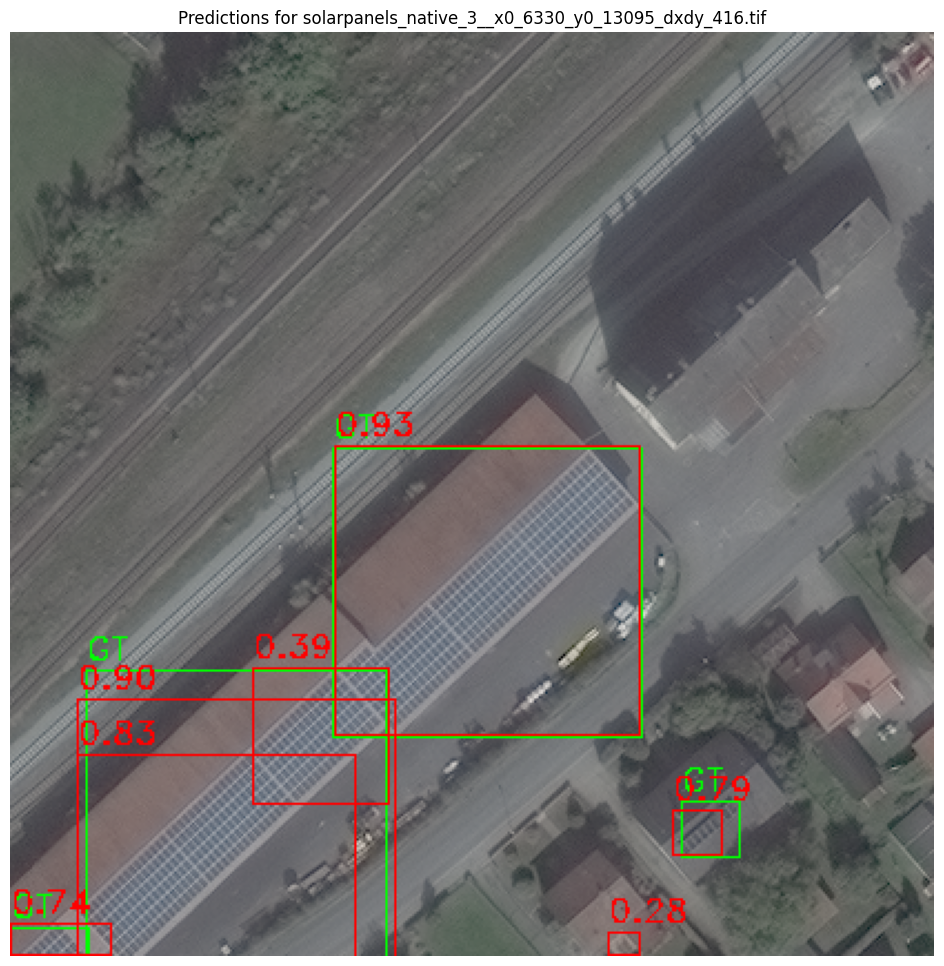


image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_5899_y0_13919_dxdy_416.tif: 416x416 3 solar_panels, 2.7ms
Speed: 0.5ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)


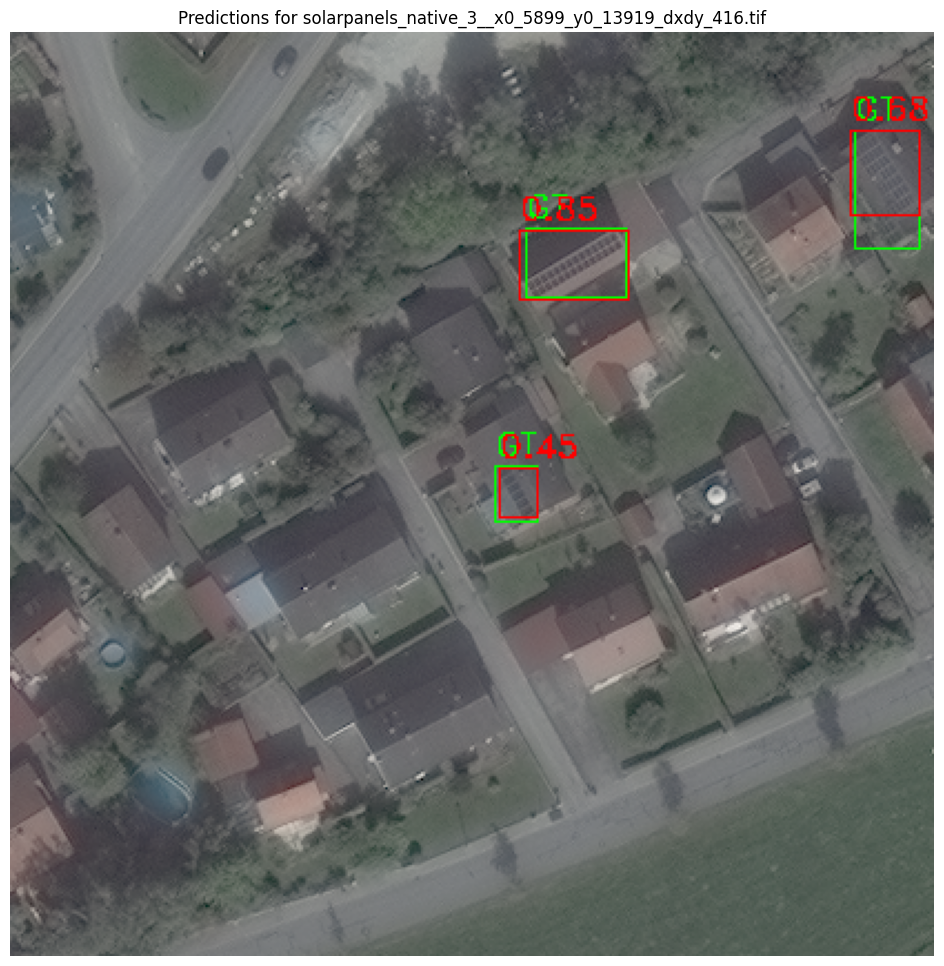


image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_9264_y0_12755_dxdy_416.tif: 416x416 3 solar_panels, 2.8ms
Speed: 0.5ms preprocess, 2.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)


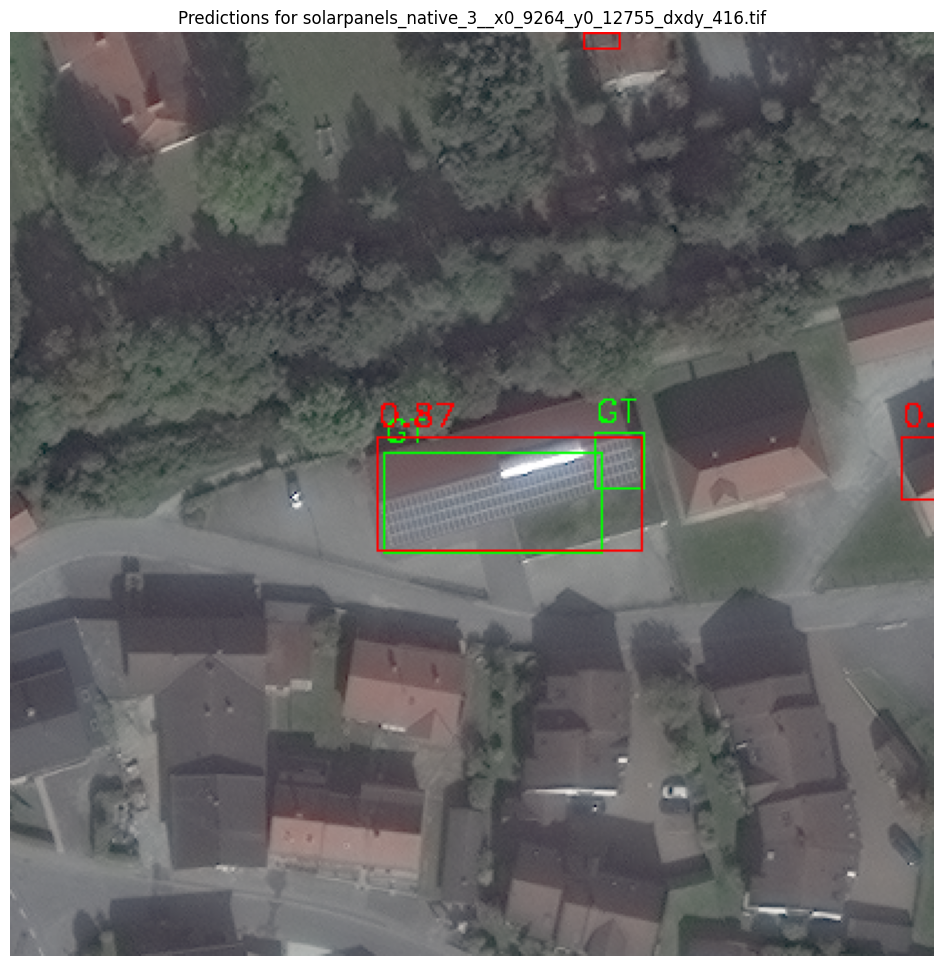


image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_8402_y0_9745_dxdy_416.tif: 416x416 4 solar_panels, 2.8ms
Speed: 0.5ms preprocess, 2.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)


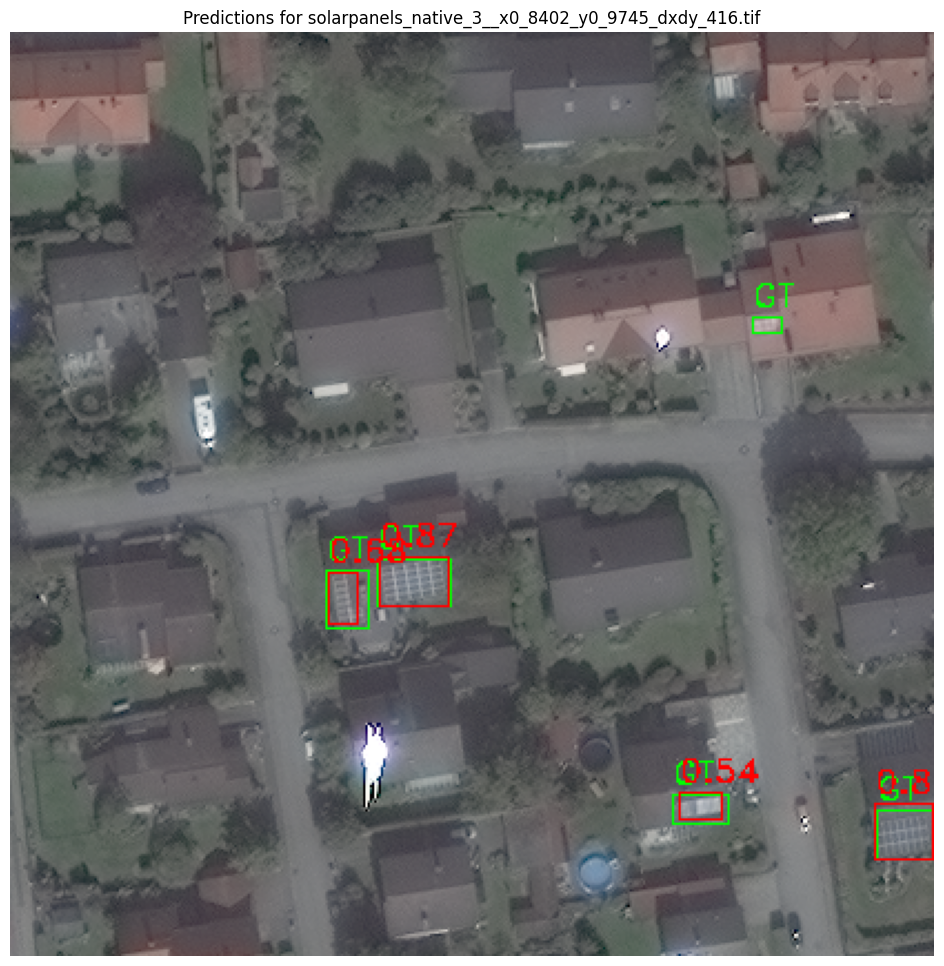


image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_8351_y0_15007_dxdy_416.tif: 416x416 4 solar_panels, 2.9ms
Speed: 0.5ms preprocess, 2.9ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)


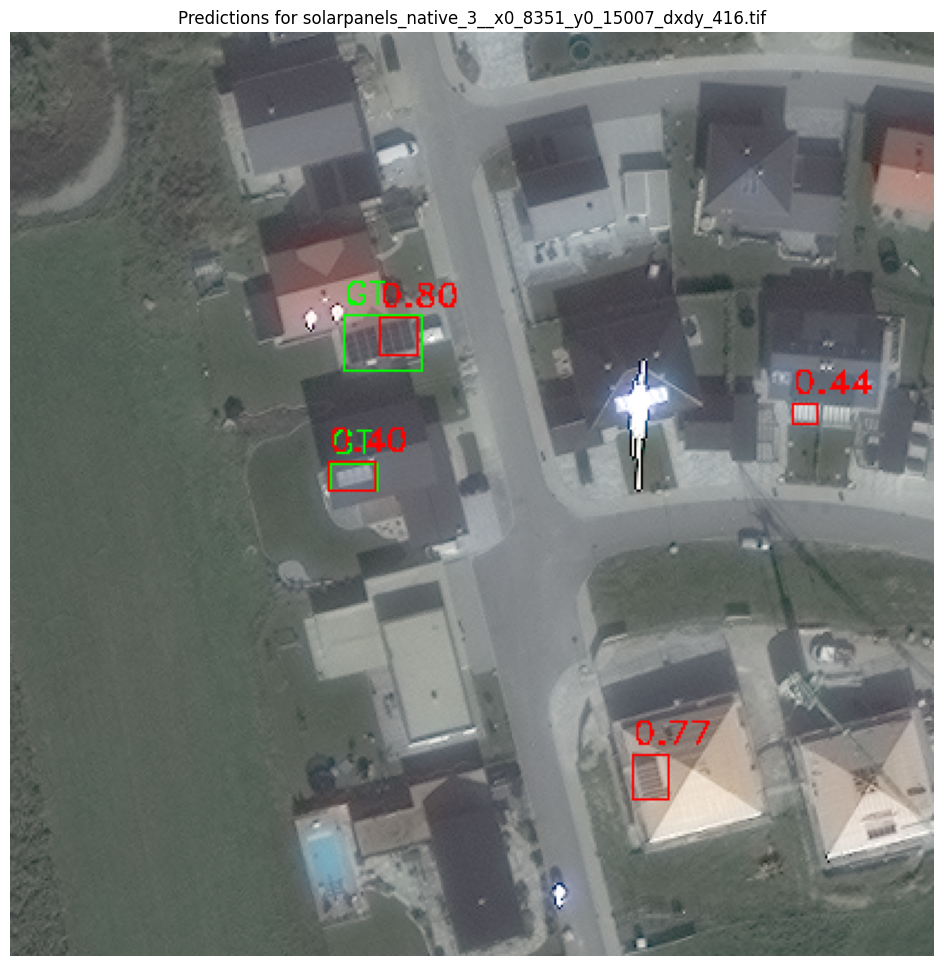

In [6]:
def load_ground_truth_boxes(label_path, img_width, img_height):
    boxes = []

    if not os.path.exists(label_path):
        return boxes
    
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            _, xc, yc, w, h = parts
            xc, yc, w, h = float(xc), float(yc), float(w), float(h)

            # int conversion since pixels should be integers
            x1 = int((xc - w / 2) * img_width)
            y1 = int((yc - h / 2) * img_height)
            x2 = int((xc + w / 2) * img_width)
            y2 = int((yc + h / 2) * img_height)
            boxes.append([x1, y1, x2, y2])

    return boxes

def draw_boxes(image_path, label_path, predictions, conf_thresh=0.25):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # ground truth boxes in green
    gt_boxes = load_ground_truth_boxes(label_path, w, h)
    for box in gt_boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 1)
        cv2.putText(img, "GT", (x1, y1 - 5), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 255, 0), 1)

    # process predictions
    # print(predictions)
    pred_result = predictions[0]

    if pred_result.boxes is not None:
        pred_boxes = pred_result.boxes.xyxy.cpu().numpy()
        pred_confs = pred_result.boxes.conf.cpu().numpy()
        for box, conf in zip(pred_boxes, pred_confs):
            if conf < conf_thresh:
                continue
            x1, y1, x2, y2 = box.astype(int)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5), cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 0, 0), 1)

    return img

# define paths for test images and labels
DATA = os.path.join(os.getcwd(), "data")
test_images_dir = os.path.join(DATA, "test", "images")
test_labels_dir = os.path.join(DATA, "test", "labels")

test_images = [f for f in os.listdir(test_images_dir) if f.endswith('.tif')]
# randomly select 5 images
selected_files = random.sample(test_images, 5)

# visualize each selected image with predictions and ground truth
for file in selected_files:
    image_path = os.path.join(test_images_dir, file)
    label_path = os.path.join(test_labels_dir, file[:-4] + ".txt")
    
    # run prediction on the image using the trained model
    predictions = model.predict(source=image_path, conf=0.25)
    
    # visualize GT and predictions
    annotated_img = draw_boxes(image_path, label_path, predictions, conf_thresh=0.25)
    
    plt.figure(figsize=(12,12))
    plt.imshow(annotated_img)
    plt.title(f"Predictions for {file}")
    plt.axis("off")
    plt.show()

Note that in the above images, green boxes denote ground truth boxes and red boxes denote predictions along with confidence scores.

## 3. Use supervision.metrics functionality from supervision library to compute the following metrics.

### a. Compute mAP50 with supervision and compare with your implementation. What do you observe?

In [7]:
def predictions_to_detections(pred_result):
    boxes = pred_result.boxes.xyxy.cpu().numpy()
    conf = pred_result.boxes.conf.cpu().numpy()
    cls = pred_result.boxes.cls.cpu().numpy().astype(int)
    return sv.Detections(xyxy = boxes, confidence = conf, class_id = cls)

def xyxy_to_yolo(box):
    x1, y1, x2, y2 = box
    x_center = (x1 + x2) / 2.0
    y_center = (y1 + y2) / 2.0
    w = x2 - x1
    h = y2 - y1
    return (x_center, y_center, w, h)

def yolo_to_xyxy(bbox):
    x, y, w, h = bbox
    return [x - w / 2, y - h / 2, x + w / 2, y + h / 2]

# calculating IoU with shapely
def iou_shapely(box1, box2):
    # box takes (minx, miny, maxx, maxy), so unpack the values from yolo format
    box1_xyxy = box(*yolo_to_xyxy(box1))
    box2_xyxy = box(*yolo_to_xyxy(box2))

    intersection = box1_xyxy.intersection(box2_xyxy).area
    union = box1_xyxy.union(box2_xyxy).area

    return intersection / union if union > 0 else 0

# calculating IoU with supervision
def iou_supervision(box1, box2):
    # box_iou_batch takes a batch of boxes as a numpy array
    box1_xyxy = np.array([yolo_to_xyxy(box1)])
    box2_xyxy = np.array([yolo_to_xyxy(box2)])

    return sv.box_iou_batch(box1_xyxy, box2_xyxy)[0][0]

def compute_pr(ground_truth_boxes, predicted_boxes, iou_threshold=0.5):
    ans = []
    gt_cnt = 0

    for ground_truth, predictions in zip(ground_truth_boxes, predicted_boxes):
        gt_cnt += len(ground_truth)
        matched = [False] * len(ground_truth)
        # sort all predictions in decreasing order of confidence
        sorted_predictions = sorted(predictions, key=lambda x: x[4], reverse=True)
        for prediction in sorted_predictions:
            pred = prediction[:4]
            max_iou, best_gt = -1, -1
            for i, gt in enumerate(ground_truth):
                if matched[i]:
                    continue # skip if already matched
                iou = iou_supervision(yolo_to_xyxy(pred), yolo_to_xyxy(gt))
                if iou > max_iou:
                    max_iou = iou
                    best_gt = i
            if max_iou >= iou_threshold and best_gt != -1: # match if best and IoU > threshold
                matched[best_gt] = True
                ans.append([prediction[4], 1]) # 1 means true positive
            else:
                ans.append([prediction[4], 0]) # 0 means false positive

    ans = sorted(ans, key=lambda x: x[0], reverse=True)
    
    tp = np.array([x[1] for x in ans])

    cum_tp = np.cumsum(tp)
    cum_fp = np.cumsum(1 - tp)
    recalls = cum_tp / gt_cnt # recall = TP / (TP + FN) = TP / total ground truths
    precisions = cum_tp / (cum_tp + cum_fp) # precision = TP / (TP + FP) = TP / total predictions

    return recalls, precisions

def pascal_voc_ap(recalls, precisions):
    ap = 0
    for t in np.linspace(0, 1, 11):
        ap += np.max(precisions[recalls >= t]) if len(precisions[recalls >= t]) > 0 else 0
    return ap / np.float32(11)

def coco_ap(recalls, precisions):
    ap = 0
    for t in np.linspace(0, 1, 101):
        ap += np.max(precisions[recalls >= t]) if len(precisions[recalls >= t]) > 0 else 0
    return ap / np.float32(101)

def area_under_curve(recalls, precisions):
    return auc(recalls, precisions)

map_metric = MeanAveragePrecision()

custom_gt_boxes = []
custom_pred_boxes = []

for file in test_images:
    image_path = os.path.join(test_images_dir, file)
    label_path = os.path.join(test_labels_dir, file[:-4] + ".txt")
    
    img = cv2.imread(image_path)
    if img is None:
        continue
    h, w, _ = img.shape
    
    # converting to Supervision Detections format
    gt_boxes_abs = load_ground_truth_boxes(label_path, w, h)
    gt_dets = sv.Detections(
        xyxy=np.array(gt_boxes_abs, dtype=np.float32),
        class_id=np.zeros((len(gt_boxes_abs),), dtype=int),
        confidence=np.ones((len(gt_boxes_abs),), dtype=np.float32)
    )

    # generating prediction for current image
    preds = model.predict(source=image_path, conf=0.3)
    pred_boxes_abs = preds[0].boxes.xyxy.cpu().numpy()
    confs = preds[0].boxes.conf.cpu().numpy()
    cls = preds[0].boxes.cls.cpu().numpy().astype(int)
    pred_dets = sv.Detections(xyxy=pred_boxes_abs, confidence=confs, class_id=cls)
    
    map_metric.update(pred_dets, gt_dets)
    
    # converting ground truth to absolute yolo format
    gt_yolo = [xyxy_to_yolo(box) for box in gt_boxes_abs]
    custom_gt_boxes.append(gt_yolo)
    
    # converting predicted boxes from absolute xyxy to absolute yolo format
    pred_yolo = []
    for box, conf in zip(pred_boxes_abs, confs):
        yolo_box = xyxy_to_yolo(box)
        pred_yolo.append(yolo_box + (conf,))
    
    custom_pred_boxes.append(pred_yolo)

map_result = map_metric.compute()
supervision_map50 = map_result.map50
print("mAP50 with supervision:", supervision_map50)

# custom mAP50
recalls, precisions = compute_pr(custom_gt_boxes, custom_pred_boxes, iou_threshold=0.5)
custom_map50_pascal = pascal_voc_ap(recalls, precisions)
custom_map50_coco = coco_ap(recalls, precisions)
custom_map50_auc = area_under_curve(recalls, precisions)

print("Custom mAP50 (Pascal VOC 11-point method):", custom_map50_pascal)
print("Custom mAP50 (COCO 101-point method):", custom_map50_coco)
print("Custom mAP50 (AUC method):", custom_map50_auc)


image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_6833_y0_12963_dxdy_416.tif: 416x416 7 solar_panels, 2.8ms
Speed: 0.4ms preprocess, 2.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_8532_y0_14457_dxdy_416.tif: 416x416 7 solar_panels, 2.6ms
Speed: 0.3ms preprocess, 2.6ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_5151_y0_12340_dxdy_416.tif: 416x416 9 solar_panels, 2.7ms
Speed: 0.3ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_6082_y0_11378_dxdy_416.tif: 416x416 4 solar_panels, 2.8ms
Speed: 0.4ms preprocess, 2.8ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 4

The mAP50 computed using the supervision library gives a value of 0.6551, while our custom implementations using different interpolation methods yield slightly higher values: 0.7089 for Pascal VOC 11-point interpolation, 0.7472 for COCO 101-point interpolation, and 0.7454 for the AUC method. These differences probably arise due to variations in how precision-recall curves are interpolated and integrated. The COCO 101-point and AUC methods tend to provide higher estimates since they capture more detailed precision values across recall levels, whereas the Pascal VOC method uses fewer interpolation points.

### b. Create a table of Precision, Recall and F1-scores where rows are IoU thresholds [0.1, 0.3, 0.5, 0.7, 0.9] and columns are confidence thresholds [0.1, 0.3, 0.5, 0.7, 0.9] (Hint use supervision.metrics.ConfusionMatrix to get the confusion matrix and get TP, FP and FN from it to compute the P, R and F-1) 


image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_6833_y0_12963_dxdy_416.tif: 416x416 11 solar_panels, 2.8ms
Speed: 0.4ms preprocess, 2.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_8532_y0_14457_dxdy_416.tif: 416x416 12 solar_panels, 2.5ms
Speed: 0.3ms preprocess, 2.5ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_5151_y0_12340_dxdy_416.tif: 416x416 12 solar_panels, 2.8ms
Speed: 0.3ms preprocess, 2.8ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /home/nishuz/Desktop/College/SRIP/Selection/data/test/images/solarpanels_native_3__x0_6082_y0_11378_dxdy_416.tif: 416x416 5 solar_panels, 2.9ms
Speed: 0.4ms preprocess, 2.9ms inference, 0.7ms postprocess per image at shape (1, 3, 416

IoU_threshold  Confidence_threshold  Precision    Recall        F1
0             0.1                   0.1   0.813134  0.664714  0.731472
1             0.1                   0.3   0.749254  0.791049  0.769585
2             0.1                   0.5   0.685970  0.862937  0.764344
3             0.1                   0.7   0.588657  0.933712  0.722080
4             0.1                   0.9   0.183284  0.998374  0.309710
5             0.3                   0.1   0.800299  0.654222  0.719925
6             0.3                   0.3   0.739104  0.780334  0.759160
7             0.3                   0.5   0.674925  0.849042  0.752037
8             0.3                   0.7   0.580299  0.920455  0.711827
9             0.3                   0.9   0.181791  0.990244  0.307188
10            0.5                   0.1   0.762388  0.623231  0.685822
11            0.5                   0.3   0.702388  0.741569  0.721447
12            0.5                   0.5   0.643582  0.809613  0.717113
13            0.5                   0.7   0.559104  0.886837  0.685829
14            0.5                   0.9   0.179701  0.978862  0.303657
15            0.7                   0.1   0.642388  0.525134  0.577873
16            0.7                   0.3   0.608657  0.642610  0.625172
17            0.7                   0.5   0.575821  0.724371  0.641610
18            0.7                   0.7   0.514925  0.816761  0.631637
19            0.7                   0.9   0.176716  0.962602  0.298613
20            0.9                   0.1   0.178507  0.145925  0.160580
21            0.9                   0.3   0.176119  0.185944  0.180898
22            0.9                   0.5   0.174030  0.218926  0.193913
23            0.9                   0.7   0.170448  0.270360  0.209081
24            0.9                   0.9   0.101791  0.554472  0.172005

F1-score Table:


Confidence_threshold       0.1       0.3       0.5       0.7       0.9
IoU_threshold                                                         
0.1                   0.731472  0.769585  0.764344  0.722080  0.309710
0.3                   0.719925  0.759160  0.752037  0.711827  0.307188
0.5                   0.685822  0.721447  0.717113  0.685829  0.303657
0.7                   0.577873  0.625172  0.641610  0.631637  0.298613
0.9                   0.160580  0.180898  0.193913  0.209081  0.172005

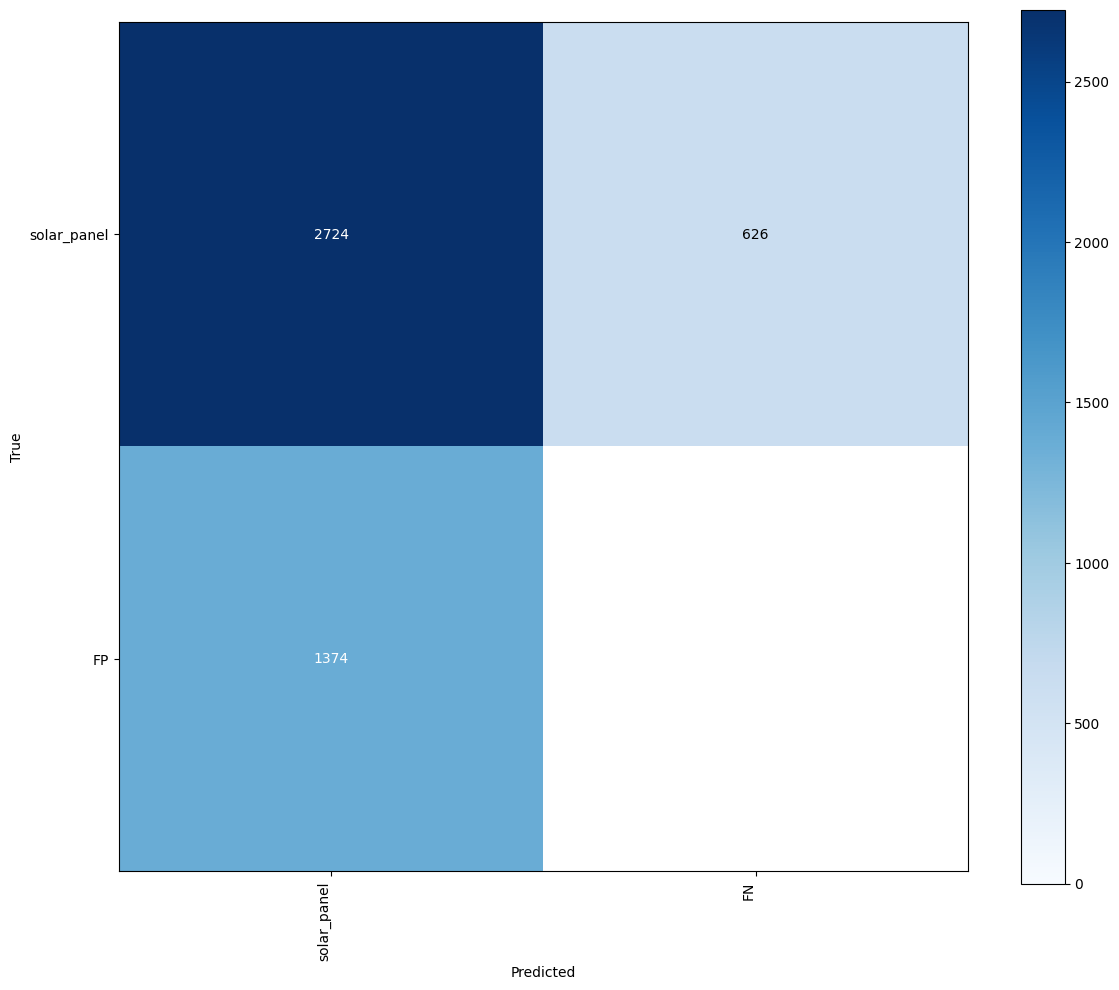

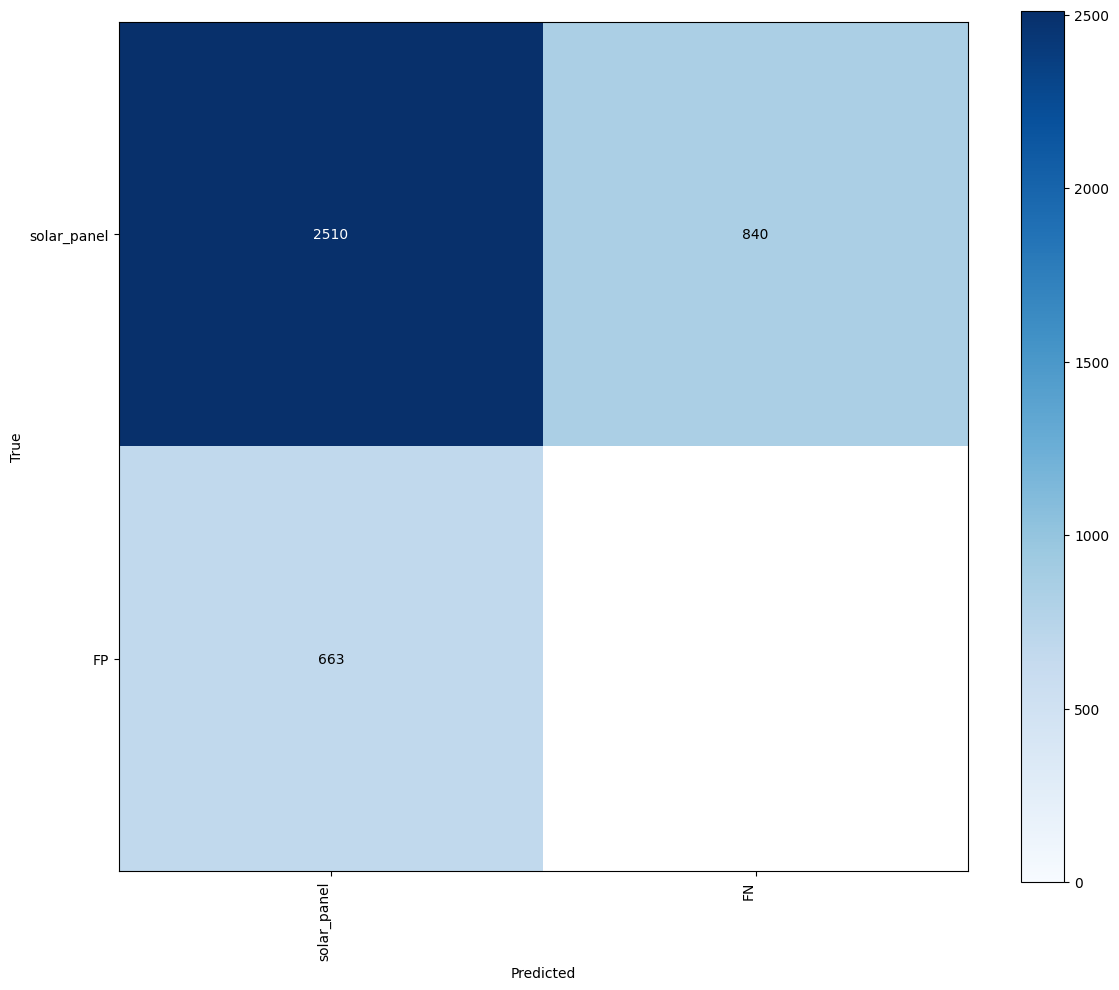

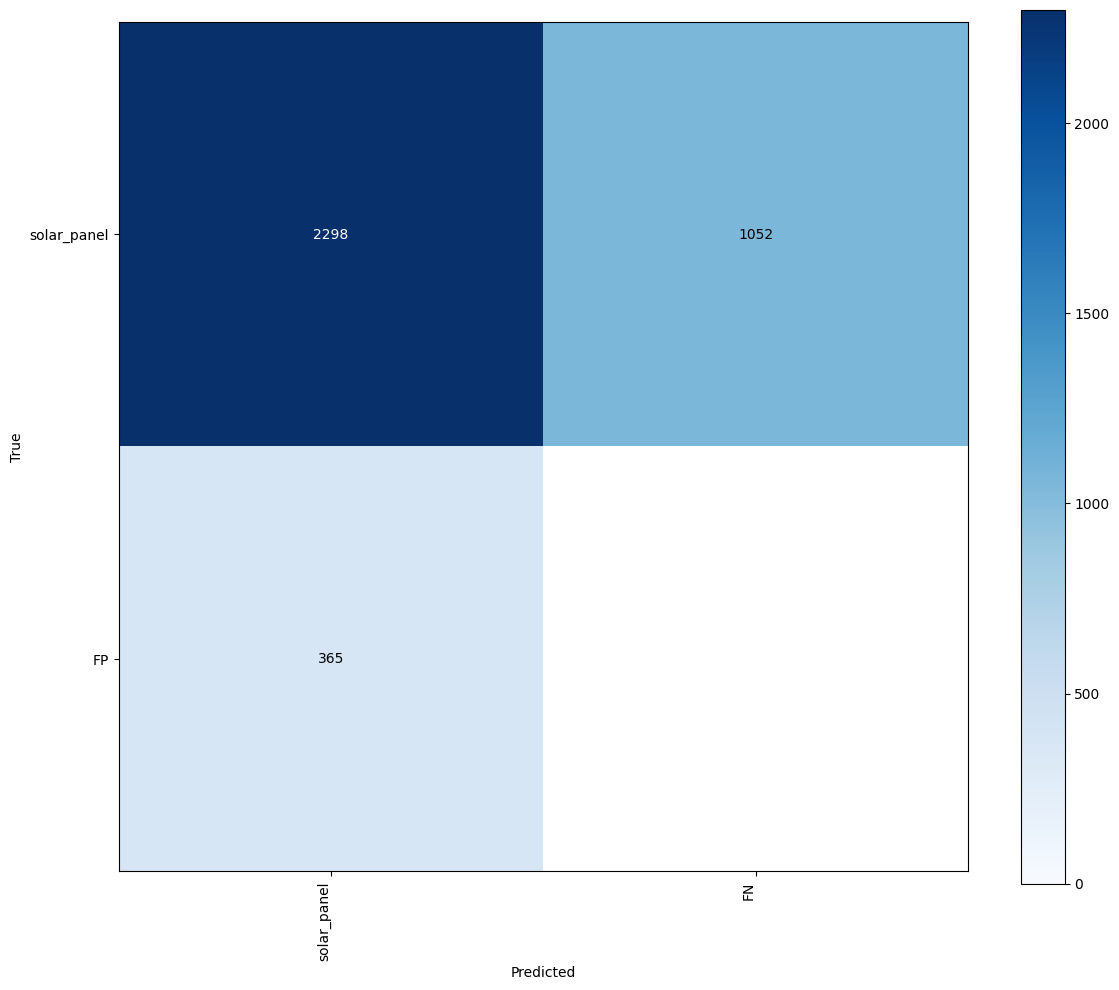

In [8]:
def load_ground_truth_boxes_float(label_path, img_width, img_height):
    boxes = []
    if not os.path.exists(label_path):
        return np.empty((0,5), dtype=np.float32)
    
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            _, xc, yc, bw, bh = parts
            xc, yc, bw, bh = float(xc), float(yc), float(bw), float(bh)
            x1 = (xc - bw / 2) * img_width
            y1 = (yc - bh / 2) * img_height
            x2 = (xc + bw / 2) * img_width
            y2 = (yc + bh / 2) * img_height
            boxes.append([x1, y1, x2, y2, 0])
    
    return np.array(boxes, dtype=np.float32)

def predictions_to_tensor(pred_result):
    if pred_result.boxes is None:
        return np.empty((0, 6), dtype=np.float32)
    boxes = pred_result.boxes.xyxy.cpu().numpy()
    confs = pred_result.boxes.conf.cpu().numpy()
    cls_arr = pred_result.boxes.cls.cpu().numpy().astype(int)
    cls_arr[:] = 0 # only one class (0)
    # tensor of schema [x1, y1, x2, y2, class, confidence]
    return np.column_stack([boxes, cls_arr, confs])

predictions_tensors = []
targets_tensors = []

for file in test_images:
    image_path = os.path.join(test_images_dir, file)
    label_path = os.path.join(test_labels_dir, file[:-4] + ".txt")
    
    h, w = float(416), float(416)

    # load ground truth boxes (absolute xyxy, with class appended)
    targets_abs = load_ground_truth_boxes_float(label_path, w, h)
    targets_tensors.append(targets_abs)
    
    # Run prediction with a low threshold to capture all detections.
    preds = model.predict(source=image_path, conf=0.1)
    pred_tensor_abs = predictions_to_tensor(preds[0])
    predictions_tensors.append(pred_tensor_abs)

iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

results_list = []

plot_cnt = 3

for iou_thr in iou_thresholds:
    for conf_thr in conf_thresholds:
        # building the confusion matrix with the given thresholds
        cm = sv.ConfusionMatrix.from_tensors(
            predictions=predictions_tensors,
            targets=targets_tensors,
            classes=["solar_panel"],
            conf_threshold=conf_thr,
            iou_threshold=iou_thr
        )

        print(cm.matrix)
        if plot_cnt > 0:
            cm.plot()
            plot_cnt -= 1
        
        TP = cm.matrix[0, 0]
        FN = cm.matrix[1, 0]
        FP = cm.matrix[0, 1]
        TN = cm.matrix[1, 1]

        # metrics
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        results_list.append({
            "IoU_threshold": iou_thr,
            "Confidence_threshold": conf_thr,
            "Precision": precision,
            "Recall": recall,
            "F1": f1
        })

df_metrics = pd.DataFrame(results_list)
print("Metrics Table:")
display(df_metrics)

df_f1 = df_metrics.pivot(index="IoU_threshold", columns="Confidence_threshold", values="F1")
print("F1-score Table:")
display(df_f1)